In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib import cm 

In [2]:
df=pd.read_csv('train.csv')

103904 are the number of rows we have in our original dataframe
Number of outlier: 425
Percentage of data removed: 0.409031413612567


<ipython-input-3-7bc43285c23d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['satisfaction']=df_final['satisfaction'].map(target_dict)
findfont: Font family ['moonspace'] not found. Falling back to DejaVu Sans.
<ipython-input-3-7bc43285c23d>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[col]=label[col].fit_transform(df_final[col])


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


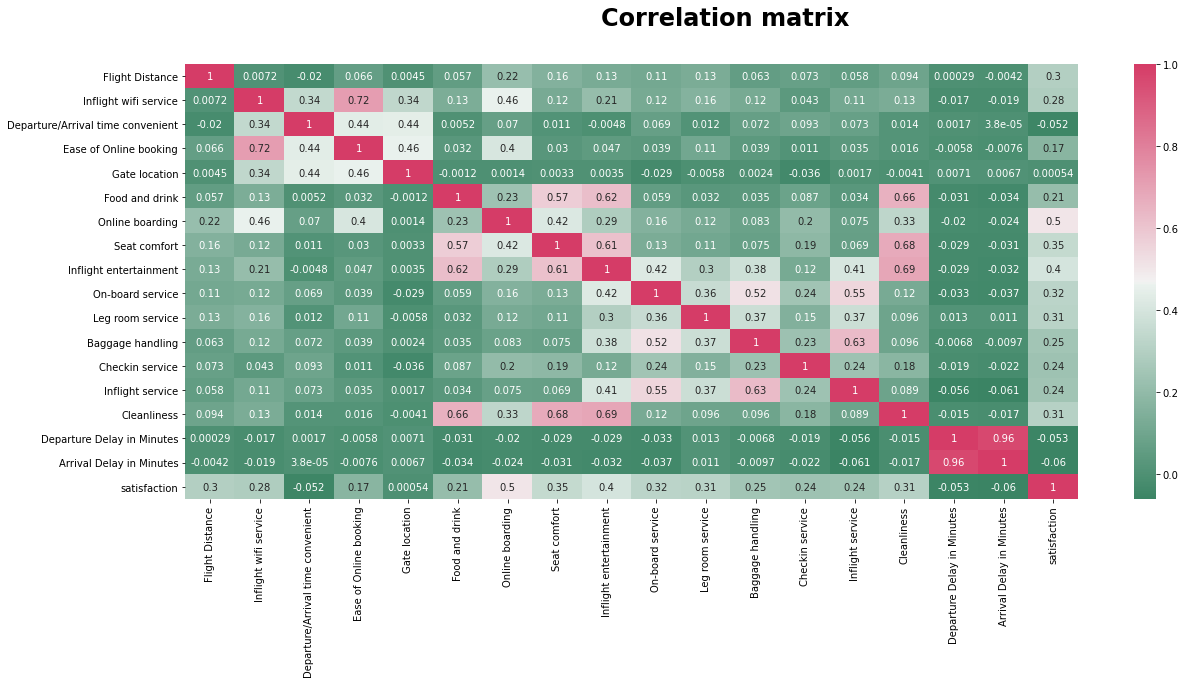

In [3]:
from sklearn.preprocessing import LabelEncoder

label={}
def RemoveOutlier(data):
    
    
    a=data.shape[0]
    print ("{} are the number of rows we have in our original dataframe".format(a))
    new_dataframe=data[(data['Flight Distance']<3995) & (data['Departure Delay in Minutes']<750) & (data['Arrival Delay in Minutes']<1000)]
    b=new_dataframe.shape[0]
    print ("Number of outlier:",(a-b))
    print("Percentage of data removed:",100-(b/a)*100)
    return new_dataframe
df_final=RemoveOutlier(df)



target_dict={'neutral or dissatisfied':0,
            'satisfied':1}
df_final['satisfaction']=df_final['satisfaction'].map(target_dict)

fig=plt.subplots(figsize=(20,8))
plt.suptitle('Correlation matrix',fontsize=24,fontname='moonspace',weight='bold')
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(df_final[['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction']].corr(),annot=True,cmap=cmap)

for col in df_final.select_dtypes(include=['object']).columns:
    label[col]=LabelEncoder()
    df_final[col]=label[col].fit_transform(df_final[col])
df_final=df_final.iloc[:,2:]
df_final.head()

[[14474   298]
 [  636 10462]]
Test Sets Accuracy: 96.39 %


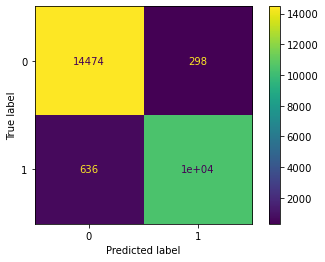

[0.96260147 0.960862   0.96231156 0.96463085 0.96153846 0.95979899
 0.96453421 0.96337457 0.96279474 0.96559389]
k Fold Cross Validation Accuracy: 96.28 %
k-Fold Cross Validation Standard Deviation: 0.17 %


In [10]:
X = df_final.iloc[:, :-1].values
y = df_final.iloc[:, -1].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train =sc.fit_transform(X_train)
X_test=sc.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(x_train,y_train)
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Test Sets Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X, y=y, cv = 10)
print (accuracies)
print("k Fold Cross Validation Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("k-Fold Cross Validation Standard Deviation: {:.2f} %".format(accuracies.std()*100))